In [2]:
# Import libraries and dependencies
import pandas as pd
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read CSV, parse dates, and set index
df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\3\06-Stu_Ripple\Resources\XRP_CAD.csv'),
                 parse_dates=True, 
                 index_col='Date')

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-05,0.219835,0.237510,0.219079,0.233581,0.233581,144482988
2017-08-06,0.234417,0.239586,0.227825,0.228135,0.228135,93762510
2017-08-07,0.227215,0.230727,0.224493,0.226909,0.226909,73581036
2017-08-08,0.227646,0.246216,0.226089,0.244045,0.244045,228131481
2017-08-09,0.243970,0.244461,0.229453,0.232251,0.232251,124163955


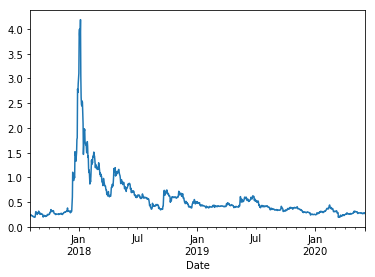

In [4]:
# Plot closing prices
df["Close"].plot()

In [9]:
# Create a series using "Close" price percentage returns, drop any NaNs, and check the results:
# (Make sure to multiply the pct_change() results by *100)

df["Return"] = df["Close"].pct_change()*100
df["Lagged_Return"] = df["Return"].shift()

df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2017-08-05,0.219835,0.237510,0.219079,0.233581,0.233581,144482988,NaN,NaN
2017-08-06,0.234417,0.239586,0.227825,0.228135,0.228135,93762510,-2.331525,NaN
2017-08-07,0.227215,0.230727,0.224493,0.226909,0.226909,73581036,-0.537401,-2.331525
2017-08-08,0.227646,0.246216,0.226089,0.244045,0.244045,228131481,7.551926,-0.537401
2017-08-09,0.243970,0.244461,0.229453,0.232251,0.232251,124163955,-4.832715,7.551926


In [10]:
# Clean df
df = df.replace(-np.inf, np.nan).dropna()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2020-05-29,0.276407,0.279393,0.271496,0.273175,0.273175,2034690252,-1.132806,1.510693
2020-05-30,0.273176,0.284366,0.271216,0.284016,0.284016,2318117709,3.968518,-1.132806
2020-05-31,0.284039,0.291242,0.278043,0.279539,0.279539,2393218537,-1.576320,3.968518
2020-06-01,0.279440,0.286106,0.278560,0.285629,0.285629,2313438019,2.178587,-1.576320
2020-06-02,0.285694,0.289766,0.271597,0.271597,0.271597,2604752640,-4.912666,2.178587


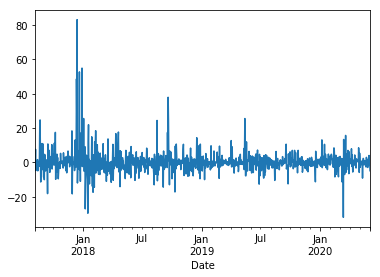

In [11]:
# Plot return
df["Return"].plot()

---

# Linear Regression with Train/Test split

In [12]:
# Create a train/test split for the data using 2017-2018 for training and 2019 for testing
train_data = df["2017":"2018"]
test_data = df["2019"]

In [15]:
# Create four DataFrames:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):

X_train = train_data["Lagged_Return"].to_frame()
X_test = test_data["Lagged_Return"].to_frame()

y_train = train_data["Return"]
y_test = test_data["Return"]

In [17]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [18]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [19]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
Results = y_test.to_frame()
Results["Predicted"] = predictions
Results.head()

,Return,Predicted
Date,,
2019-01-01,3.274942,0.080079
2019-01-02,2.934295,0.691393
2019-01-03,-5.091100,0.664396
2019-01-04,-1.731090,0.028386
2019-01-05,-0.426041,0.294666


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A50868D788>,
      dtype=object)

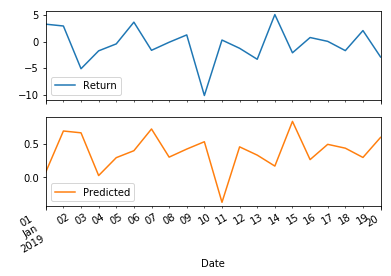

In [20]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

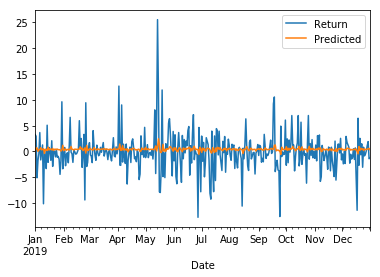

In [21]:
Results.plot()

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the DataFrame above)
mse = mean_squared_error(Results["Return"],
                         Results["Predicted"])

print(f"Out of sample MSE is {mse}.")

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out of sample RMSE is {rmse}")

Out of sample MSE is 14.07875470814452.
Out of sample RMSE is 3.7521666684922885


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [35]:
# Construct a DataFrame using just the "y" training data:
in_sample = y_train.to_frame()
#in_sample.head()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample["In_Sample_Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample["Return"],
                                   in_sample["In_Sample_Predictions"])

print(f"In sample MSE is {in_sample_mse}")

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)

print(f"In sample RMSE is {in_sample_rmse}")

In sample MSE is 73.40985267487545
In sample RMSE is 8.567954987911378


---

Question: How does the model perform out-of-sample (on data that it has never seen before)? Are the predictions as good as, better, or worse than those that were observed for the training dataset?

Answer: The out-of-sample RMSE is lower than the in-sample RMSE. RMSE is typically lower for training data, but is higher in this case.